In [ ]:
# Se impotan las librerias de manipulación de datos #
import pandas as pd
import numpy as np

# Se importa Matplotit y Searborn para visualziaciones #
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

# Se importa la herramienta para suprimir las advertencias de pandas #
import warnings
warnings.filterwarnings("ignore")

# Se importa herramienta para modelado #
import lightgbm as lgb

# Se importa las herramientas utiles #
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score,silhouette_score,silhouette_samples,calinski_harabasz_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# Importe de Dataframe "test" (prueba) #
df_test = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQ4FKTVylodq_-r6xlQX76c1qSZC9AzgTWayTgIdzYpgfYwgoS6uj96ozO3TlqV0XpwRWQAo12ffU4a/pub?gid=0&single=true&output=csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
# Importe de Dataframe "train" (entrenamiento) #
df_train = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRL55FMYP5fSEdsTj1aBG9uBIklH_sMqBlZdcNg0fgsPiND863gaiG_0uIiR9unsfAjGSEJqNiKuk19/pub?output=csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Se elimina las variables con baja correlación en dataframe TEST#
Variable_elimin_test=['Id','MSSubClass','OverallCond','BsmtFinSF2','LowQualFinSF','BsmtHalfBath','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']
test_x=df_test.drop(labels=Variable_elimin_test, axis=1)
test_x.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'PoolQC',
       'Fence', 'MiscFeature'

In [ ]:
# Se elimina las variables con baja correlación en dataframe TRAIN#
Variable_elimin_train=['Id','MSSubClass','OverallCond','BsmtFinSF2','LowQualFinSF','BsmtHalfBath','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']
train_x=df_train.drop(labels=Variable_elimin_train, axis=1)
train_x.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'PoolQC',
       'Fence', 'MiscFeature'

In [ ]:
# Se busca las columnas que tengan valores numericos #
col_num_test = test_x.select_dtypes(include=['number'])
col_num_test.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch'],
      dtype='object')

In [ ]:
# Se reemplaza con la media los valores numericos NaN para dataframe TRAIN#
# Se busca las columnas que tengan valores numericos #
col_num_train = train_x.select_dtypes(include=['number'])
col_num_train.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'SalePrice'],
      dtype='object')

In [ ]:
# Se calcula la media y se reemplaza los valores NaN de dataframe TEST#
medias_test = col_num_test.mean()
col_num_test = col_num_test.fillna(medias_test)
test_x.update(col_num_test)

In [ ]:
# Se calcula la media y se reemplaza los valores NaN de dataframe TRAIN#
medias_train = col_num_train.mean()
col_num_train = col_num_train.fillna(medias_train)
train_x.update(col_num_train)

In [ ]:
# Se normaliza el dataframe TEST#
X = col_num_test.values
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)
X

array([[ 0.55558736,  0.36392912, -0.75110125, ...,  0.36667832,
        -0.70162774, -0.3607383 ],
       [ 0.60423927,  0.89786065, -0.05487716, ...,  2.34786727,
        -0.17882599, -0.3607383 ],
       [ 0.26367594,  0.80964587, -0.75110125, ...,  0.93049493,
        -0.20787053, -0.3607383 ],
       ...,
       [ 4.44773966,  2.05514965, -0.75110125, ...,  2.98216096,
        -0.70162774, -0.3607383 ],
       [-0.3201469 ,  0.12552719, -0.75110125, ..., -0.10316887,
        -0.23691507, -0.3607383 ],
       [ 0.26367594, -0.03879049,  0.64134693, ...,  0.75821763,
        -0.00455874, -0.3607383 ]])

In [ ]:
# Se normaliza el dataframe TRAIN #
Y = col_num_train.values
sc = StandardScaler()
sc.fit(Y)
Y = sc.transform(Y)
Y

array([[-0.22937175, -0.20714171,  0.65147924, ...,  0.21650316,
        -0.3593249 ,  0.34727322],
       [ 0.4519361 , -0.09188637, -0.07183611, ..., -0.70448325,
        -0.3593249 ,  0.00728832],
       [-0.09311018,  0.07347998,  0.65147924, ..., -0.07036146,
        -0.3593249 ,  0.53615372],
       ...,
       [-0.18395123, -0.14781027,  0.65147924, ...,  0.20140502,
        -0.3593249 ,  1.07761115],
       [-0.09311018, -0.08016039, -0.79515147, ..., -0.70448325,
         1.47378925, -0.48852299],
       [ 0.22483348, -0.05811155, -0.79515147, ...,  0.32219013,
        -0.3593249 , -0.42084081]])

In [ ]:
# Se crea diccionarios vacios para almacenar los resultados de dataframe TEST#
sse_test,db_test,slc_test,cal_test = {}, {}, {}, {}
for k in range(2, 10):
    # Se usa semilla de 10 para asegurar reproducibilidad #
    # Se calcula el algoritmo K means #
    kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=10).fit(X)
    # Se extrae los labels #
    clusters = kmeans.labels_
    # Se calcula la inercia, es decir las distancias de las muestras a su centroide mas cercano #
    sse_test[k] = kmeans.inertia_
    # Se calcula el indice de Davies Bouldin #
    db_test[k] = davies_bouldin_score(X,clusters)
    # Se calcula el indice de Silhouette #
    slc_test[k] = silhouette_score(X,clusters)
    # Se calcula el indice de Calinski-Harabasz #
    cal_test[k] = calinski_harabasz_score(X,clusters)

In [ ]:
sse_test

{2: 29334.67403359012,
 3: 26825.830871485105,
 4: 25261.65347251682,
 5: 23783.94481416596,
 6: 22559.428062135266,
 7: 21531.716612588756,
 8: 20658.853248079526,
 9: 19957.038936266174}

In [ ]:
from sys import call_tracing
# Se crea diccionarios vacios para almacenar los resultados de dataframe TEST#
sse_train,db_train,slc_train,call_train = {}, {}, {}, {}
for k in range(2, 10):
    # Se usa semilla de 10 para asegurar reproducibilidad #
    # Se calcula el algoritmo K means #
    kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=10).fit(Y)
    # Se extrae los labels #
    clusters = kmeans.labels_
    # Se calcula la inercia, es decir las distancias de las muestras a su centroide mas cercano #
    sse_train[k] = kmeans.inertia_
    # Se calcula el indice de Davies Bouldin #
    db_train[k] = davies_bouldin_score(Y,clusters)
    # Se calcula el indice de Silhouette #
    slc_train[k] = silhouette_score(Y,clusters)
    # Se calcula el indice de Calinski-Harabasz #
    call_train[k] = calinski_harabasz_score(Y,clusters)

In [ ]:
sse_train

{2: 30462.953957697857,
 3: 28008.972085152716,
 4: 26250.75935104693,
 5: 24629.33510628385,
 6: 23351.484545763728,
 7: 22403.947649905567,
 8: 21487.220809366438,
 9: 20582.515577767907}

## **METODO DEL CODO**

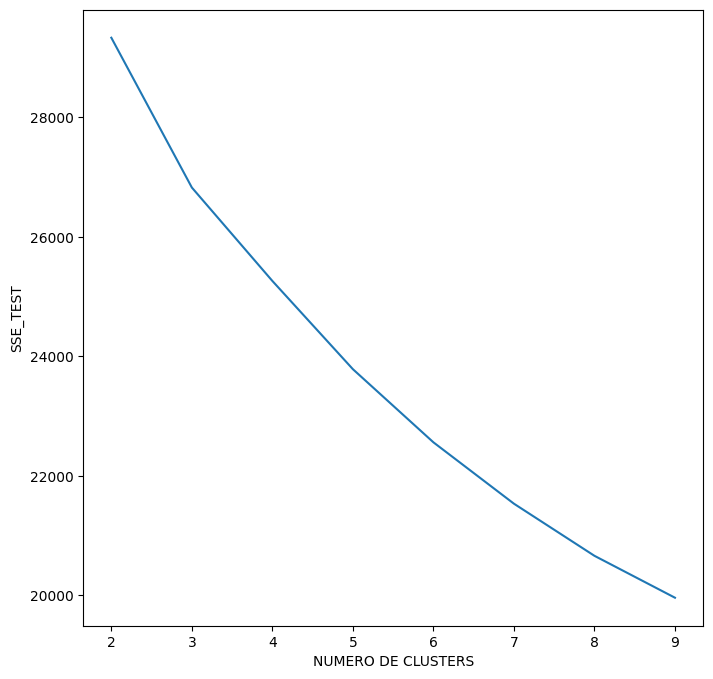

In [ ]:
# Se visualiza el numero optimo para TEST#
plt.figure(figsize=(8,8))
plt.plot(list(sse_test.keys()), list(sse_test.values()))
plt.xlabel("NUMERO DE CLUSTERS")
plt.ylabel("SSE_TEST")
plt.show()

El valor óptimo es 3

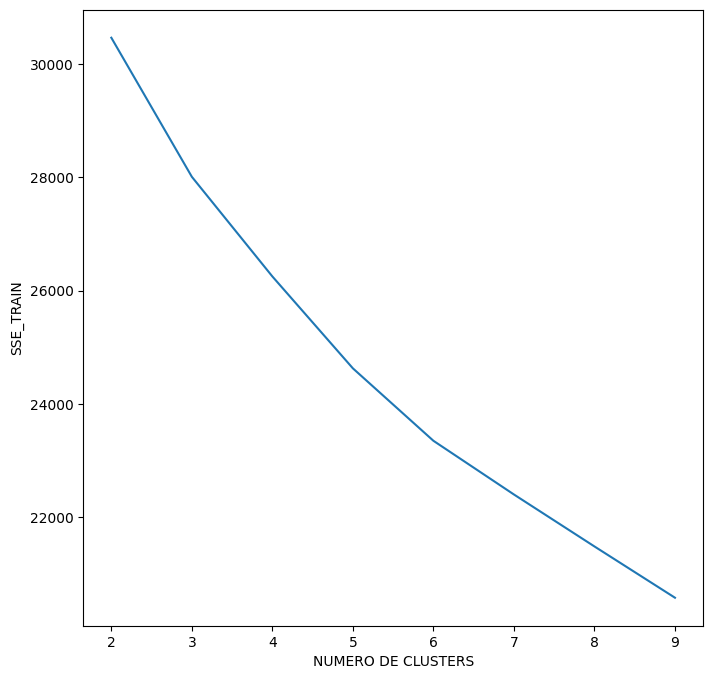

In [ ]:
# Se visualiza el numero optimo para TRAIN#
plt.figure(figsize=(8,8))
plt.plot(list(sse_train.keys()), list(sse_train.values()))
plt.xlabel("NUMERO DE CLUSTERS")
plt.ylabel("SSE_TRAIN")
plt.show()

El valor óptimo es 3 o 6

## **DAVIES-BOULDIN INDEX**

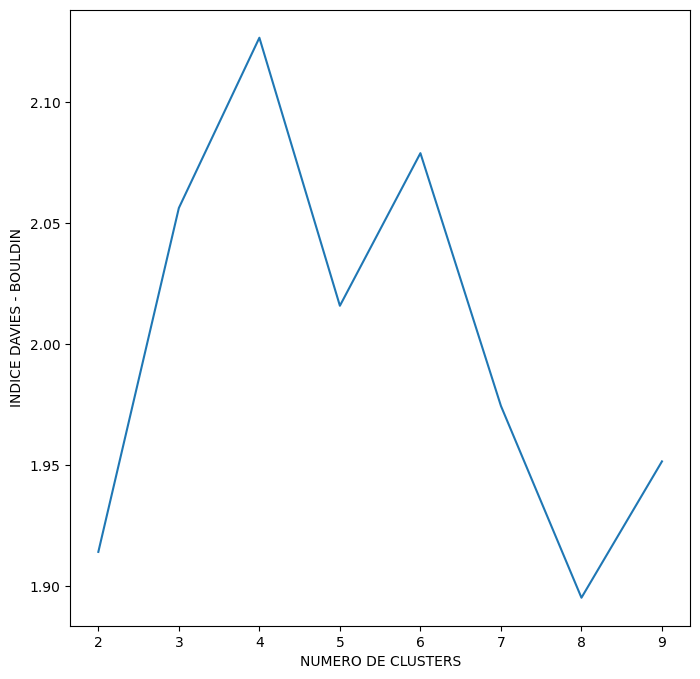

In [ ]:
# Se visualiza el índice de Davies-Bouldin (DBI) para TEST#
plt.figure(figsize=(8,8))
plt.plot(list(db_test.keys()), list(db_test.values()))
plt.xlabel("NUMERO DE CLUSTERS")
plt.ylabel("INDICE DAVIES - BOULDIN")
plt.show()

El valor óptimo es 8

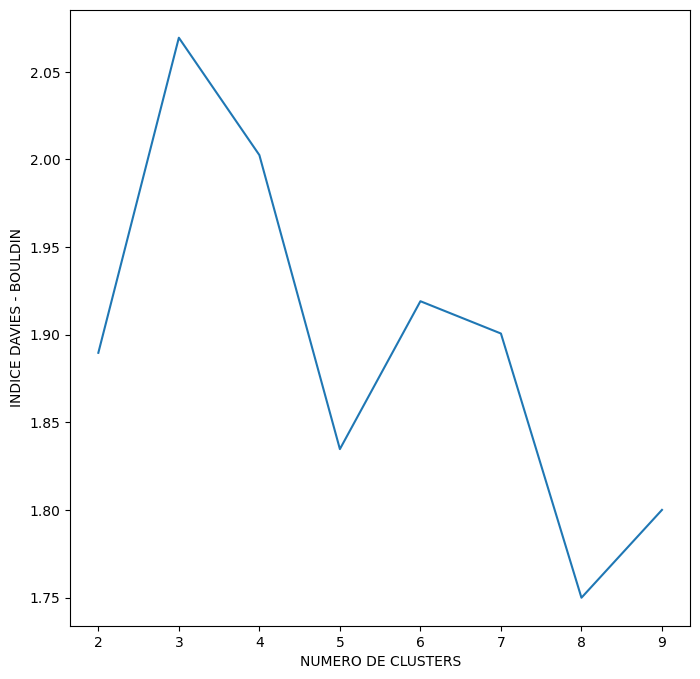

In [ ]:
# Se visualiza el índice de Davies-Bouldin (DBI) para TRAIN#
plt.figure(figsize=(8,8))
plt.plot(list(db_train.keys()), list(db_train.values()))
plt.xlabel("NUMERO DE CLUSTERS")
plt.ylabel("INDICE DAVIES - BOULDIN")
plt.show()

El valor óptimo es 8

## **INDICE DE SILHOUETTE**

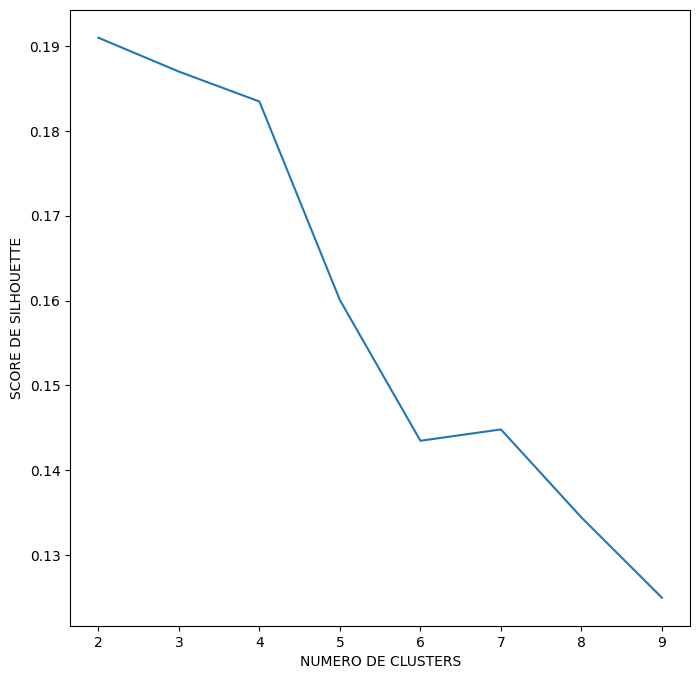

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(list(slc_test.keys()), list(slc_test.values()))
plt.xlabel("NUMERO DE CLUSTERS")
plt.ylabel("SCORE DE SILHOUETTE")
plt.show()

El valor óptimo es 2

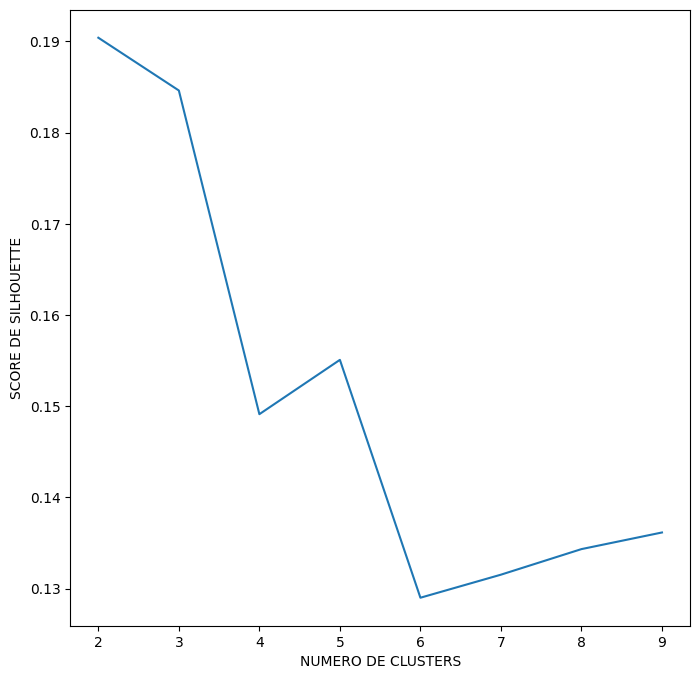

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(list(slc_train.keys()), list(slc_train.values()))
plt.xlabel("NUMERO DE CLUSTERS")
plt.ylabel("SCORE DE SILHOUETTE")
plt.show()

El valor óptimo es 2

Para n_clusters = 2 El promedio del score de silhouette es:  0.1909607047127827
Para n_clusters = 3 El promedio del score de silhouette es:  0.18697276091475845
Para n_clusters = 4 El promedio del score de silhouette es:  0.18344949183478695
Para n_clusters = 5 El promedio del score de silhouette es:  0.1600504071657188
Para n_clusters = 6 El promedio del score de silhouette es:  0.14347582915037818
Para n_clusters = 7 El promedio del score de silhouette es:  0.14481023552716707
Para n_clusters = 8 El promedio del score de silhouette es:  0.13443814198010293


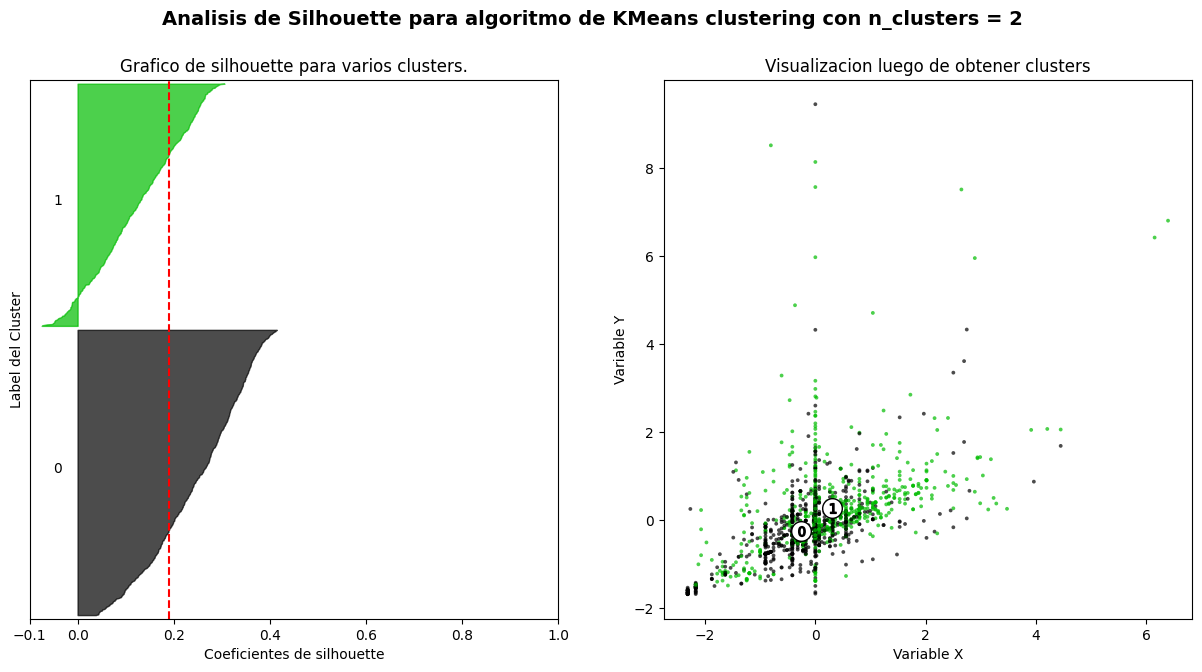

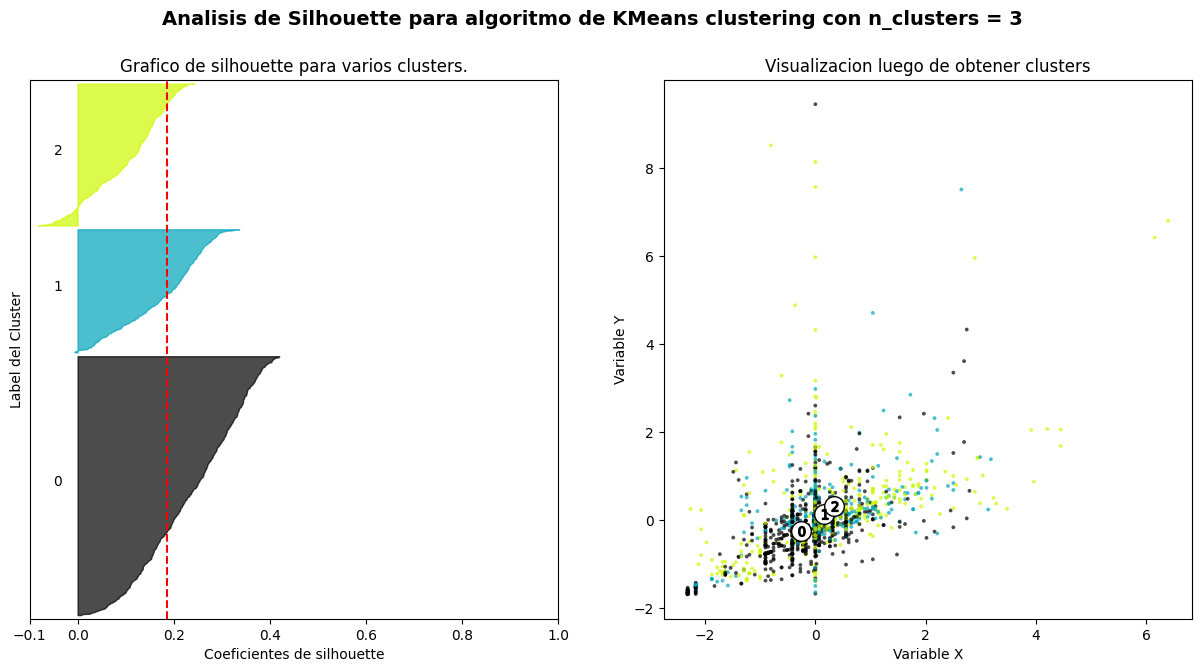

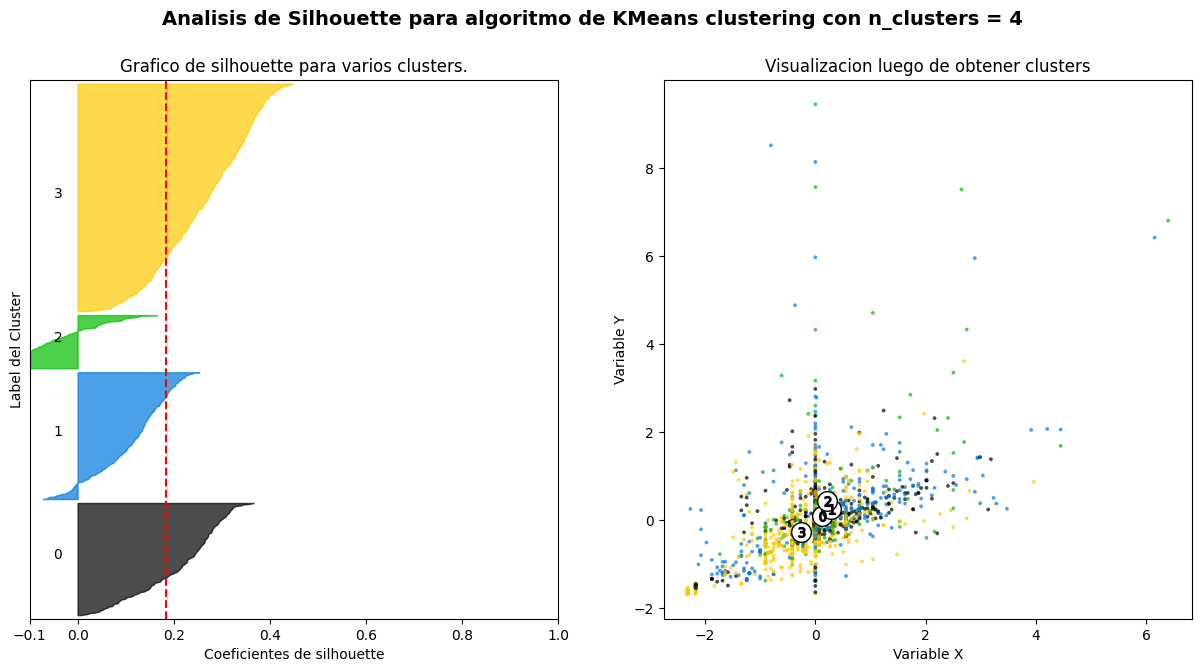

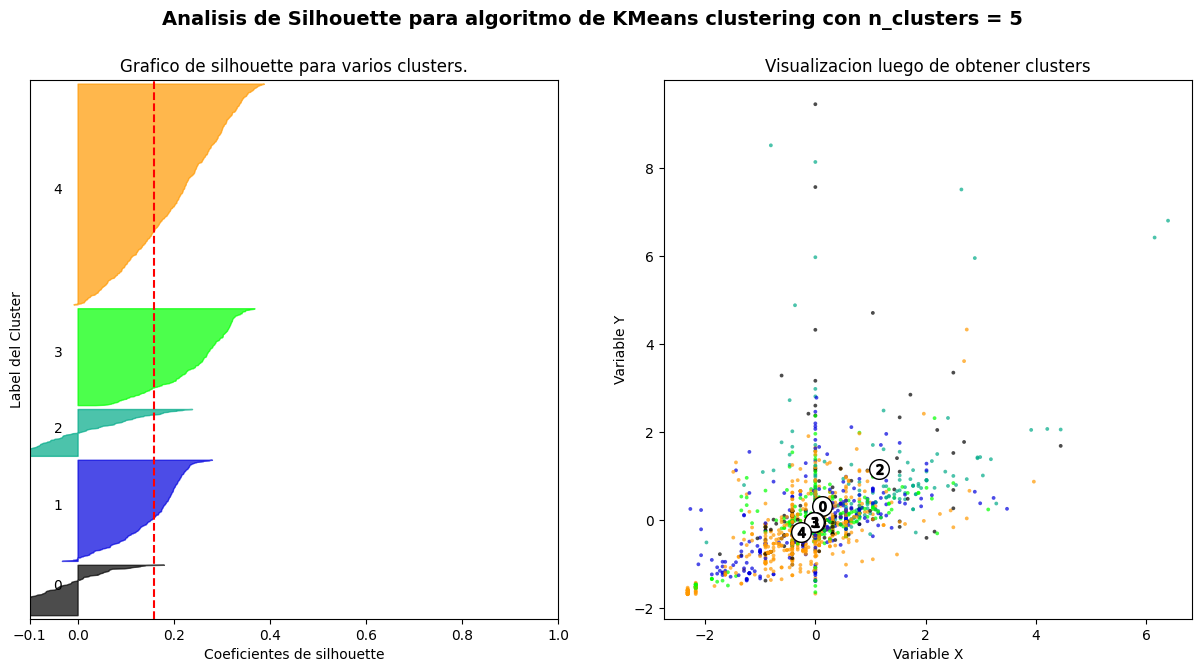

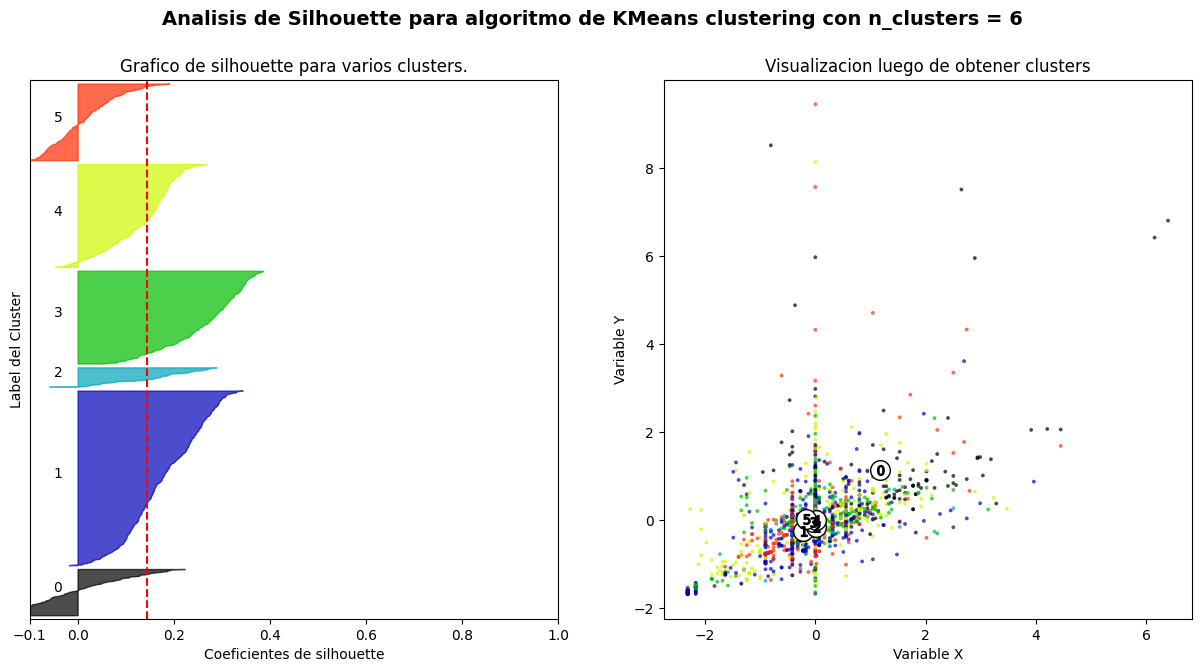

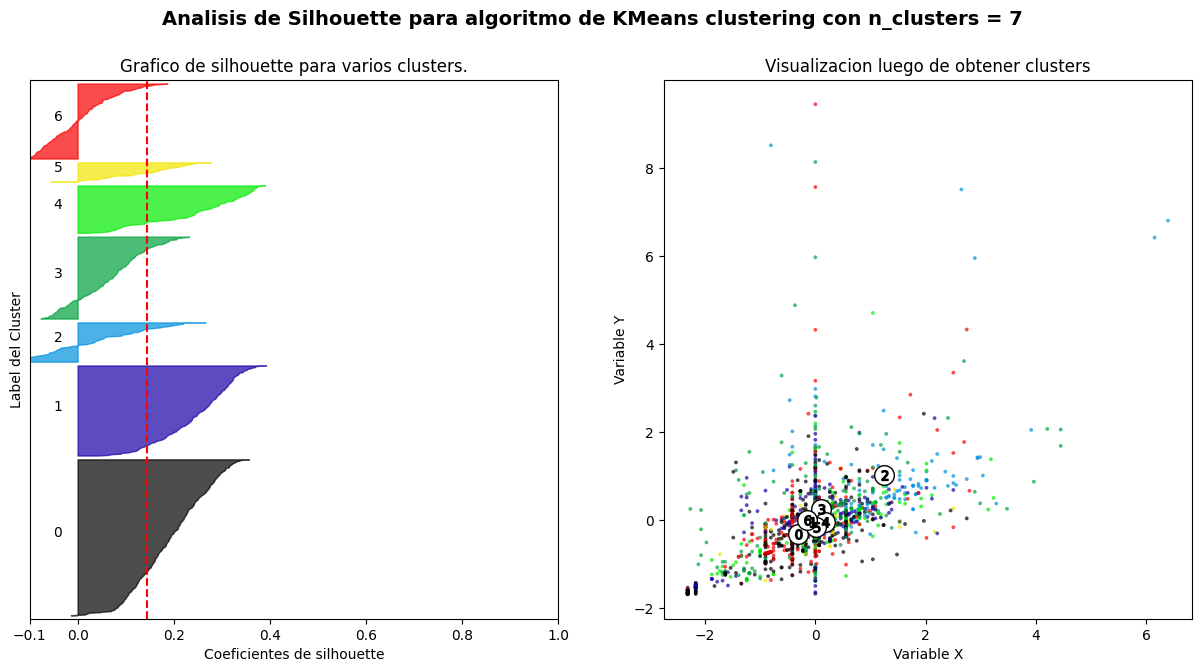

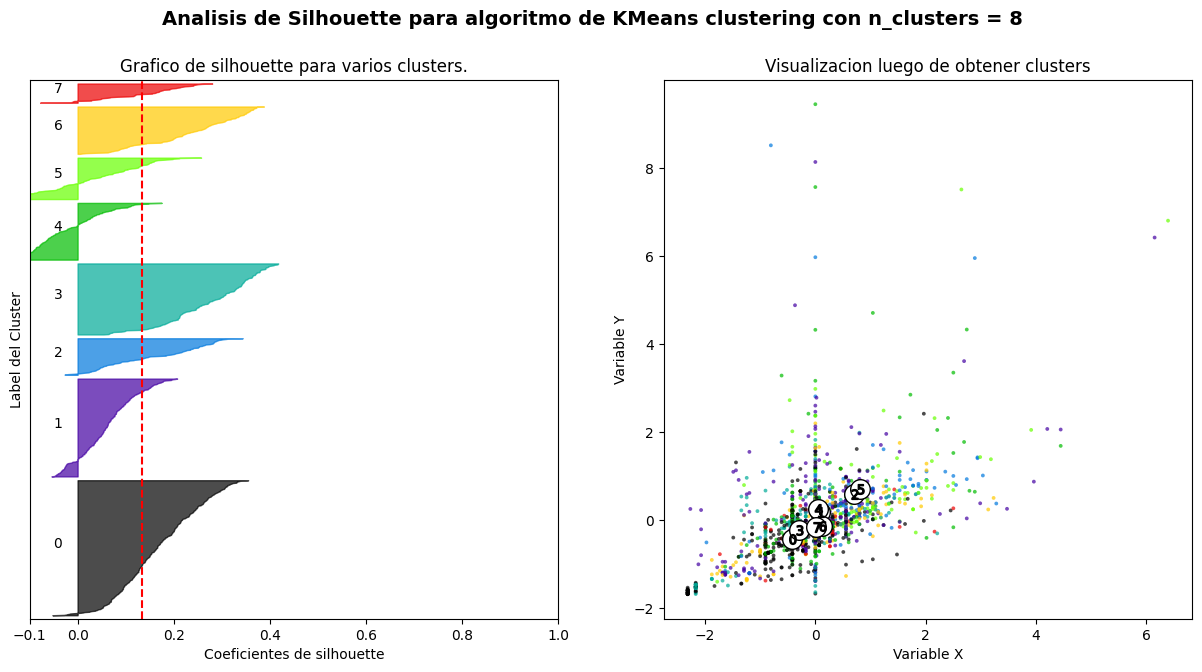

In [ ]:
# Gráfico para dataframe TEST #
for n_clusters in range(2, 9):
    # Se crear un subplot de 1 fila y 2 columnas #
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 7)
    # El 1er subplot es para el score de silhouette siendo [-1, 1] #
    ax1.set_xlim([-0.1, 1])
    # Se inserta un espacio en blanco entre la silueta con (n_clusters+1)*10 y el grafico de la nube de puntos #
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    # Se inicia el proceso de ajuste a los datos #
    clusterer = KMeans(n_clusters=n_clusters,max_iter=1000, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    # Se calcula el promedio de silhouette_score para todos los valores #
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El promedio del score de silhouette es: ", silhouette_avg)
    # Se calcular el score de silhouette para cada muestra #
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Se agregar los scores de silhouette para las muestras pertenecientes al cluster i y se ordenan #
        ith_cluster_silhouette_values =sample_silhouette_values[cluster_labels == i]
        # Se ordenan #
        ith_cluster_silhouette_values.sort()
        # Se evalua el tamaño de clusters #
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        # Se define la paleta de colroes #
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        # Se etiqueta las gráficas de silhouette con sus miembros de cluster en el medio #
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Se calcular el nuevo y_lower para la proxima gráfica #
        y_lower = y_upper + 10
    ax1.set_title("Grafico de silhouette para varios clusters.")
    ax1.set_xlabel("Coeficientes de silhouette")
    ax1.set_ylabel("Label del Cluster")
    # Se calcula la linea vertical para el promedio del score de silhouette de todos los valores #
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    # Se eliminan valores labels en y #
    ax1.set_yticks([])
    # Se definen ticks de comparación #
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # La 2da gráfica es para visualziar los clusters formados #
    # Se define colores #
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    # Se calcula lo valores scatterplot #
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')
    # Se etiqueta los clusters #
    centers = clusterer.cluster_centers_
    # Se dibujar en color blanco los centroides de los clusters #
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')
    # Se enumerar los centroides #
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')
    ax2.set_title("Visualizacion luego de obtener clusters")
    ax2.set_xlabel("Variable X")
    ax2.set_ylabel("Variable Y")

    plt.suptitle(("Analisis de Silhouette para algoritmo de KMeans clustering "
                  "con n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Para n_clusters = 2 El promedio del score de silhouette es:  0.19040643166093288
Para n_clusters = 3 El promedio del score de silhouette es:  0.1846191872377215
Para n_clusters = 4 El promedio del score de silhouette es:  0.14912410839673151
Para n_clusters = 5 El promedio del score de silhouette es:  0.1550816397159288
Para n_clusters = 6 El promedio del score de silhouette es:  0.12899691732609544
Para n_clusters = 7 El promedio del score de silhouette es:  0.13152445374824884
Para n_clusters = 8 El promedio del score de silhouette es:  0.13432830796184964


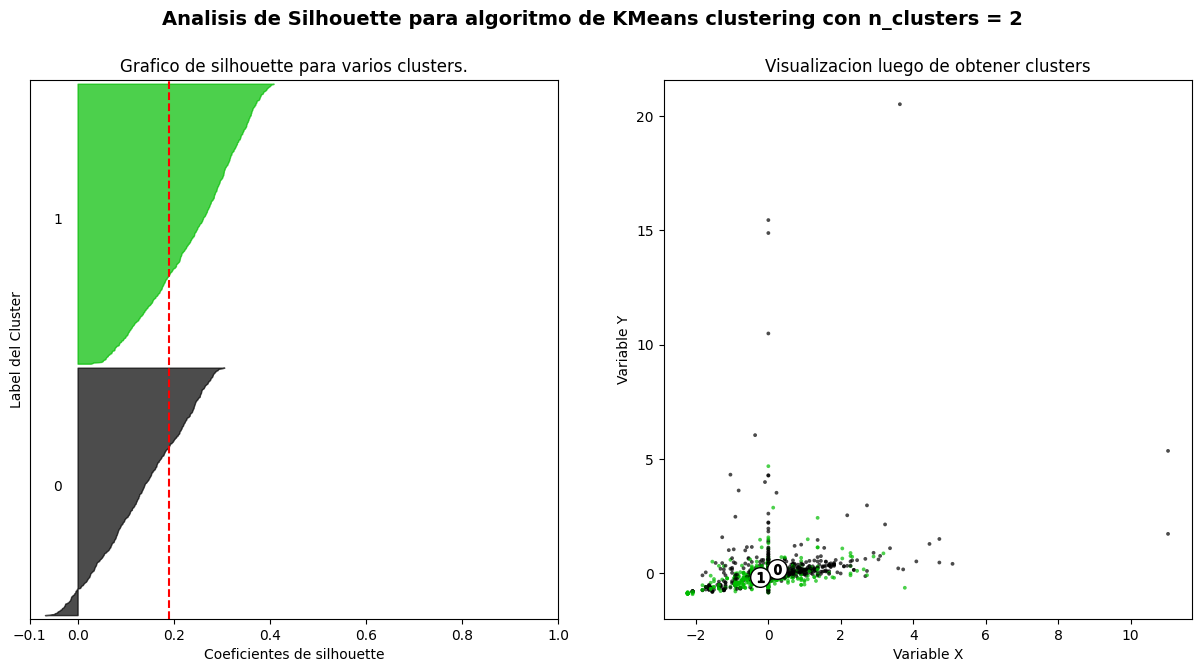

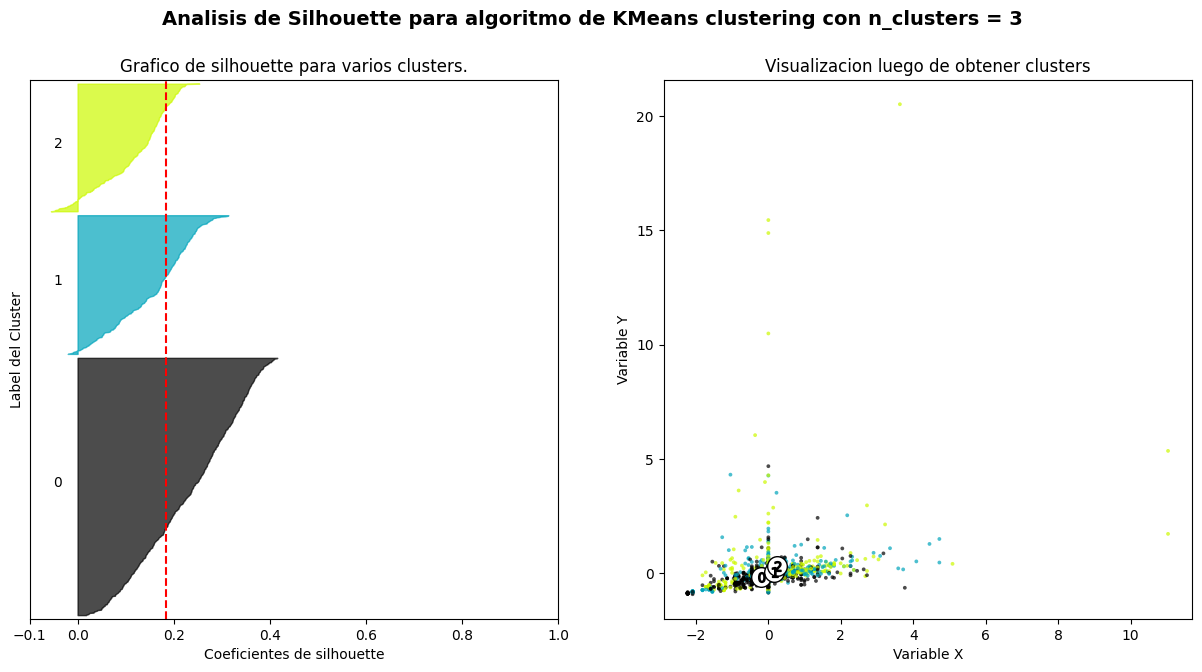

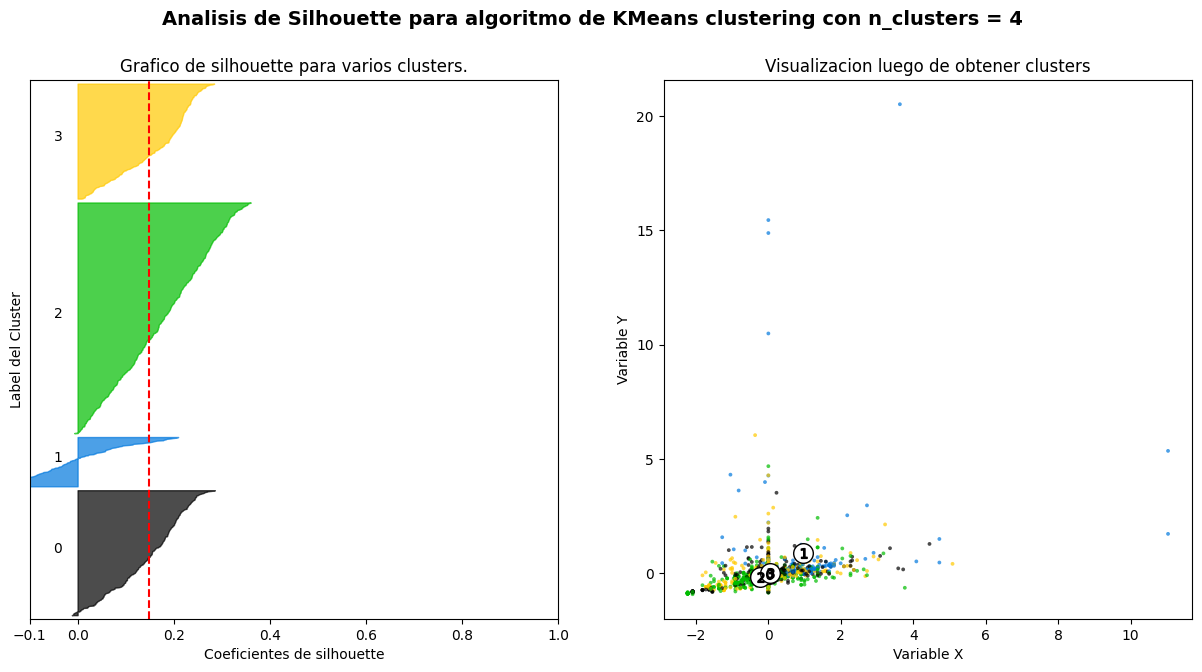

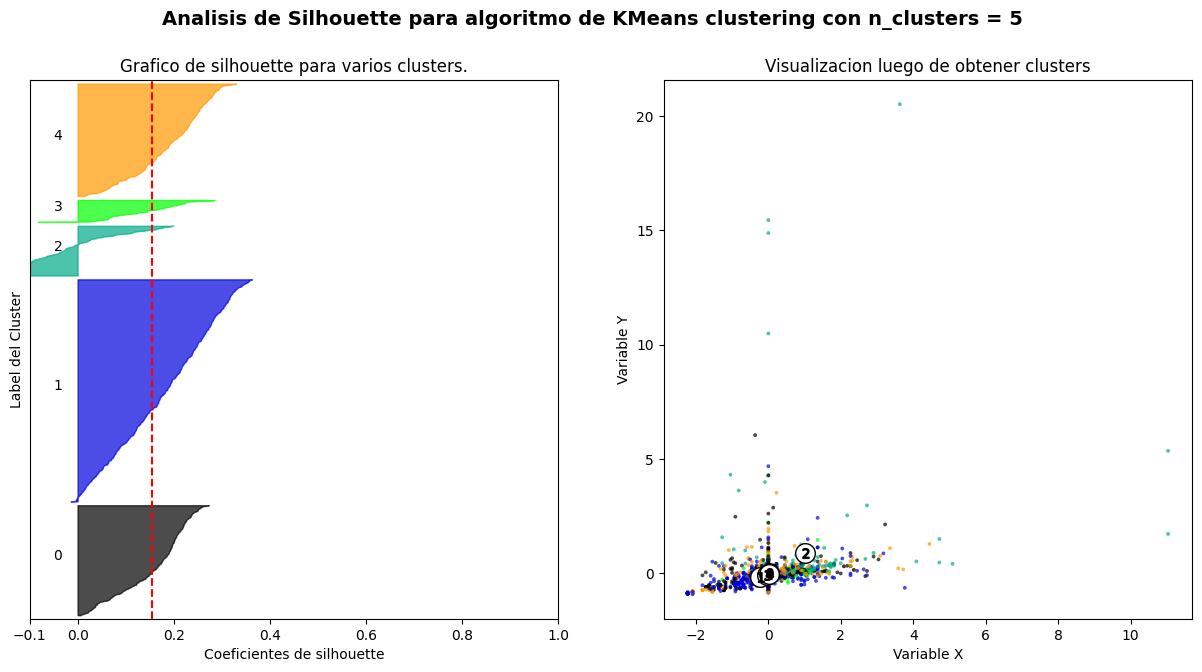

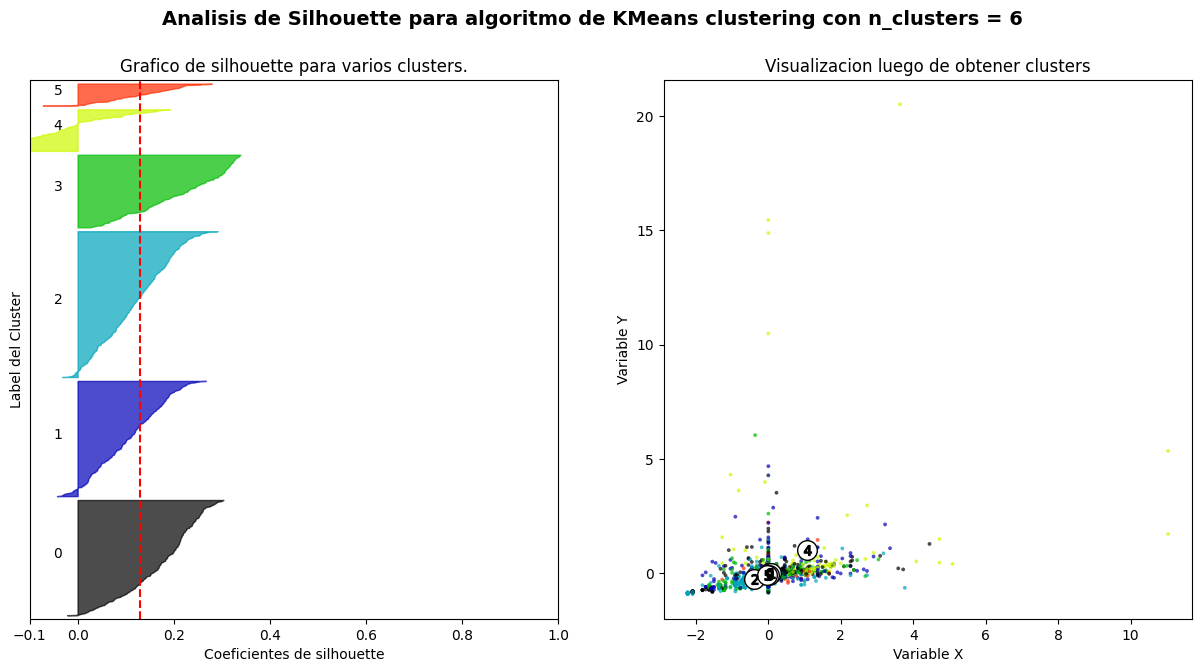

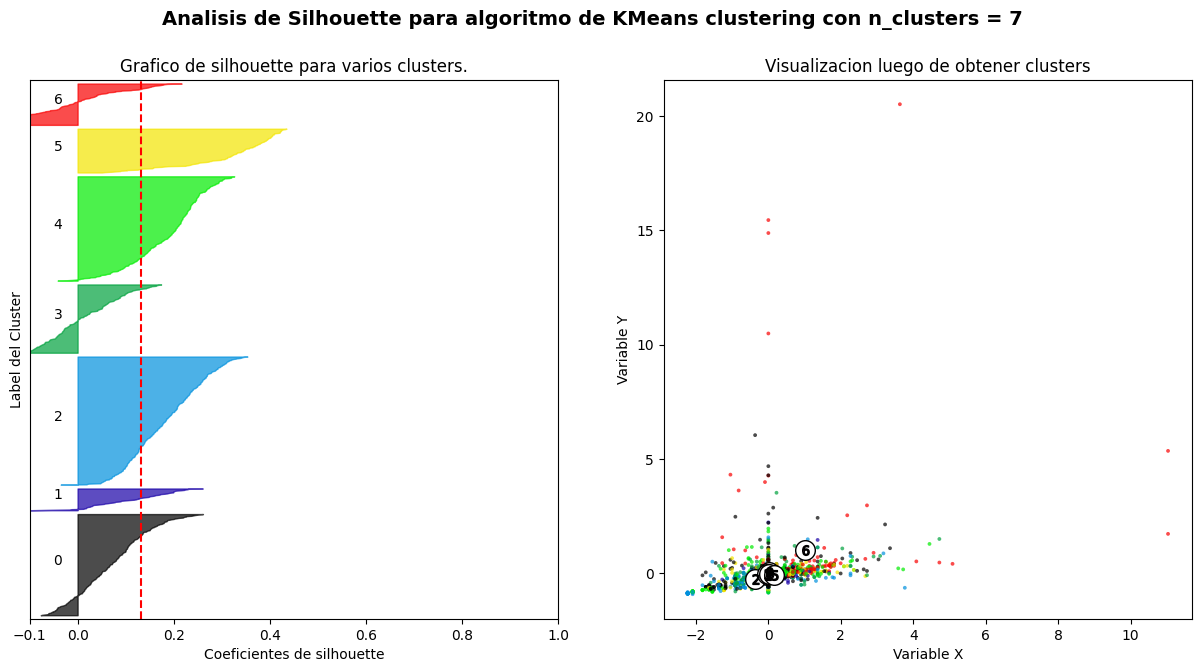

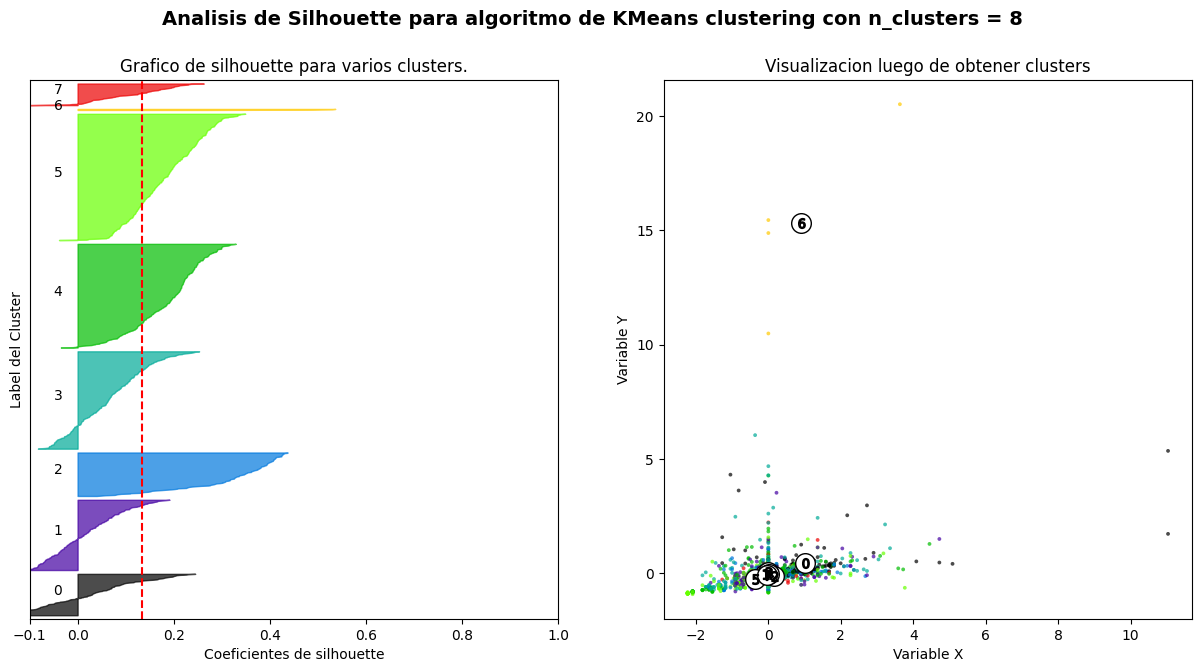

In [ ]:
# Gráfico para dataframe TRAIN #
for n_clusters in range(2, 9):
    # Se crear un subplot de 1 fila y 2 columnas #
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 7)
    # El 1er subplot es para el score de silhouette siendo [-1, 1] #
    ax1.set_xlim([-0.1, 1])
    # Se inserta un espacio en blanco entre la silueta con (n_clusters+1)*10 y el grafico de la nube de puntos #
    ax1.set_ylim([0, len(Y) + (n_clusters + 1) * 10])
    # Se inicia el proceso de ajuste a los datos #
    clusterer = KMeans(n_clusters=n_clusters,max_iter=1000, random_state=10)
    cluster_labels = clusterer.fit_predict(Y)
    # Se calcula el promedio de silhouette_score para todos los valores #
    silhouette_avg = silhouette_score(Y, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El promedio del score de silhouette es: ", silhouette_avg)
    # Se calcular el score de silhouette para cada muestra #
    sample_silhouette_values = silhouette_samples(Y, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Se agregar los scores de silhouette para las muestras pertenecientes al cluster i y se ordenan #
        ith_cluster_silhouette_values =sample_silhouette_values[cluster_labels == i]
        # Se ordenan #
        ith_cluster_silhouette_values.sort()
        # Se evalua el tamaño de clusters #
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        # Se define la paleta de colroes #
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        # Se etiqueta las gráficas de silhouette con sus miembros de cluster en el medio #
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Se calcular el nuevo y_lower para la proxima gráfica #
        y_lower = y_upper + 10
    ax1.set_title("Grafico de silhouette para varios clusters.")
    ax1.set_xlabel("Coeficientes de silhouette")
    ax1.set_ylabel("Label del Cluster")
    # Se calcula la linea vertical para el promedio del score de silhouette de todos los valores #
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    # Se eliminan valores labels en y #
    ax1.set_yticks([])
    # Se definen ticks de comparación #
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # La 2da gráfica es para visualziar los clusters formados #
    # Se define colores #
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    # Se calcula lo valores scatterplot #
    ax2.scatter(Y[:, 0], Y[:, 1], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')
    # Se etiqueta los clusters #
    centers = clusterer.cluster_centers_
    # Se dibujar en color blanco los centroides de los clusters #
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')
    # Se enumerar los centroides #
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')
    ax2.set_title("Visualizacion luego de obtener clusters")
    ax2.set_xlabel("Variable X")
    ax2.set_ylabel("Variable Y")

    plt.suptitle(("Analisis de Silhouette para algoritmo de KMeans clustering "
                  "con n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


- El mayor valor de Silhouette se observa para **n_clusters**=2, lo cual indica que esta configuración de 2 clusters es la que proporciona la mejor separación entre clusters.

- La barra de los coeficientes de silhouette esta mas cercana a cero, es decir refleja superposición entre clusters.

- Como es de esperar en muchos casos, a medida que aumenta el número de clusters, el valor del coeficiente de Silhouette tiende a disminuir. Sin embargo, no se visualiza una disminución abrupta que indique un número óptimo de clusters.


## **GRAFICO DE CLUSTER PARA K = 2**

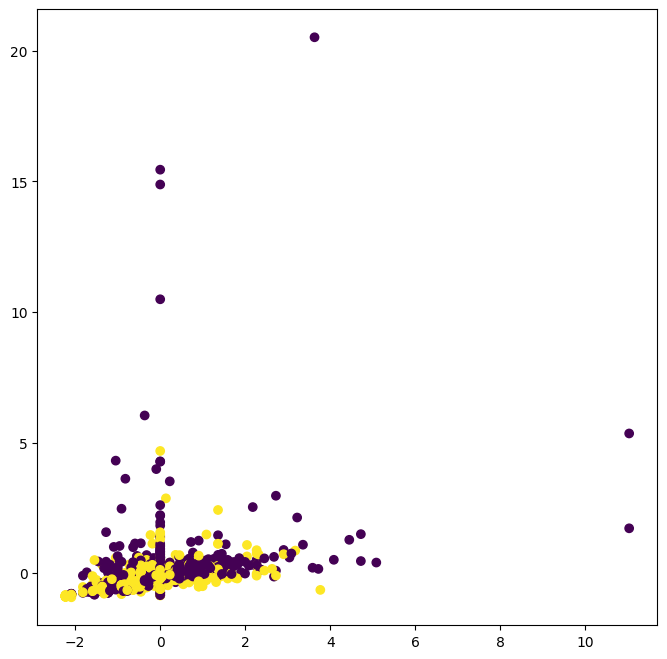

In [74]:
# Se desnormaliza los datos #
# Se calcula el algoritmo K means #
kmeans = KMeans(n_clusters=2, max_iter=1000,random_state=10).fit(Y)
labels = kmeans.labels_
X = sc.inverse_transform(Y)
plt.figure(figsize=(8,8))
plt.scatter(Y[:,0],Y[:,1],c=labels)
plt.show()

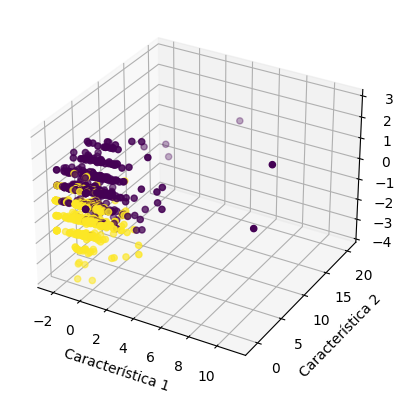

In [75]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Y[:, 0], Y[:, 1], Y[:, 2], c=labels, cmap='viridis')
ax.set_xlabel('Característica 1')
ax.set_ylabel('Característica 2')
ax.set_zlabel('Característica 3')
plt.show()